# *Tweet Sentiment Analysis*

Steps which I followed to complete the task:
1. Import dependencies
2. Import and load dataset into dataframe
3. Remove unnecessary columns
4. Data Pre-processing
5. Exploratory Data Analysis
6. Create Training and Test Data
7. Train and Test data vectorization
8. Create and train ML models
  1. Bernoulli Naive Bayes (BernoulliNB)
  2. Logistic Regression (LR)
9. Evaluate the ML models

## 1. Import Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
from wordcloud import WordCloud
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
import demoji

## 2. Create Dataframe

In [3]:
# Load dataset into dataframe and also add title row

df = pd.read_csv('sentiment140/training.1600000.processed.noemoticon.csv', encoding='ISO-8859-1', names=['Sentiment_Score', 'ID', 'Date_Time','NO_QUERY','Account_Name','Tweet'])
df.head()

,Sentiment_Score,ID,Date_Time,NO_QUERY,Account_Name,Tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column           Non-Null Count    Dtype 
---  ------           --------------    ----- 
 0   Sentiment_Score  1600000 non-null  int64 
 1   ID               1600000 non-null  int64 
 2   Date_Time        1600000 non-null  object
 3   NO_QUERY         1600000 non-null  object
 4   Account_Name     1600000 non-null  object
 5   Tweet            1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


## 3. Remove unnecessary columns

In [5]:
df = df.drop(['ID','Date_Time','NO_QUERY','Account_Name'], axis=1)
df.head()

,Sentiment_Score,Tweet
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [6]:
# To check number of labels

df['Sentiment_Score'].unique()

array([0, 4], dtype=int64)

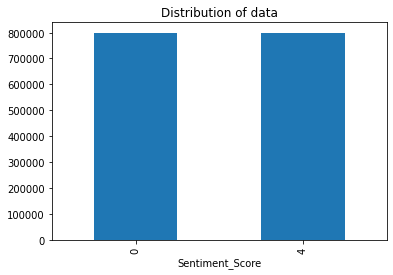

In [7]:
# Distribution of data

ax = df.groupby('Sentiment_Score').count().plot(kind='bar', title='Distribution of data',
                                               legend=False)

In [8]:
# Define the inputs and targets

text, sentiment = list(df['Tweet']), list(df['Sentiment_Score'])
text

["@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D",
 "is upset that he can't update his Facebook by texting it... and might cry as a result  School today also. Blah!",
 '@Kenichan I dived many times for the ball. Managed to save 50%  The rest go out of bounds',
 'my whole body feels itchy and like its on fire ',
 "@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there. ",
 '@Kwesidei not the whole crew ',
 'Need a hug ',
 "@LOLTrish hey  long time no see! Yes.. Rains a bit ,only a bit  LOL , I'm fine thanks , how's you ?",
 "@Tatiana_K nope they didn't have it ",
 '@twittera que me muera ? ',
 "spring break in plain city... it's snowing ",
 'I just re-pierced my ears ',
 "@caregiving I couldn't bear to watch it.  And I thought the UA loss was embarrassing . . . . .",
 '@octolinz16 It it counts, idk why I did either. you never talk to me anymore ',
 "@smarrison i wo

## 4. Data Pre-processing

In [10]:
# Define one function to perform all pre-processing tasks

from nltk.stem import WordNetLemmatizer

def preprocess(textdata):
    processedText = []
    
    # Create Lemmatizer
    wordLemm = WordNetLemmatizer()
    
    # Defining regex patterns.
    urlPattern        = r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)"
    userPattern       = '@[^\s]+'
    alphaPattern      = "[^a-zA-Z0-9]"
    sequencePattern   = r"(.)\1\1+"
    seqReplacePattern = r"\1\1"
    
    for tweet in textdata:
        tweet = tweet.lower()
        
        # Replace all URls with 'URL'
        tweet = re.sub(urlPattern,'',tweet)

        # Replace @USERNAME to 'USER'.
        tweet = re.sub(userPattern,'', tweet)        
        # Replace all non alphabets.
        tweet = re.sub(alphaPattern, " ", tweet)
        # Replace 3 or more consecutive letters by 2 letter.
        tweet = re.sub(sequencePattern, seqReplacePattern, tweet)

        tweetwords = ''
        for word in tweet.split():
            if len(word)>1:
                # Lemmatizing the word.
                word = wordLemm.lemmatize(word)
                tweetwords += (word+' ')
            
        processedText.append(tweetwords)
        
    return processedText

In [11]:
len(text)

1600000

In [12]:
# for emoji
def emoji(text):
    processed_emoji_list = []
    for tweet in text:
        # print(list(demoji.findall(t).values())[0])
        try:
            d = demoji.replace_with_desc(tweet,sep=list(demoji.findall(tweet).values())[0])
            processed_emoji_list.append(d)
        except:
            processed_emoji_list.append(tweet)

    return processed_emoji_list

In [13]:
processed_emoji_text = emoji(text)

In [14]:
# These 2 packages are not present in nltk_data so I manually download them
# nltk.download('wordnet')
# nltk.download('omw-1.4')

# Apply pre-processing on tweets
processedtext = preprocess(processed_emoji_text)

In [15]:
len(processed_emoji_text)

1600000

In [16]:
len(processedtext)

1600000

## 5. Exploratory Data Analysis

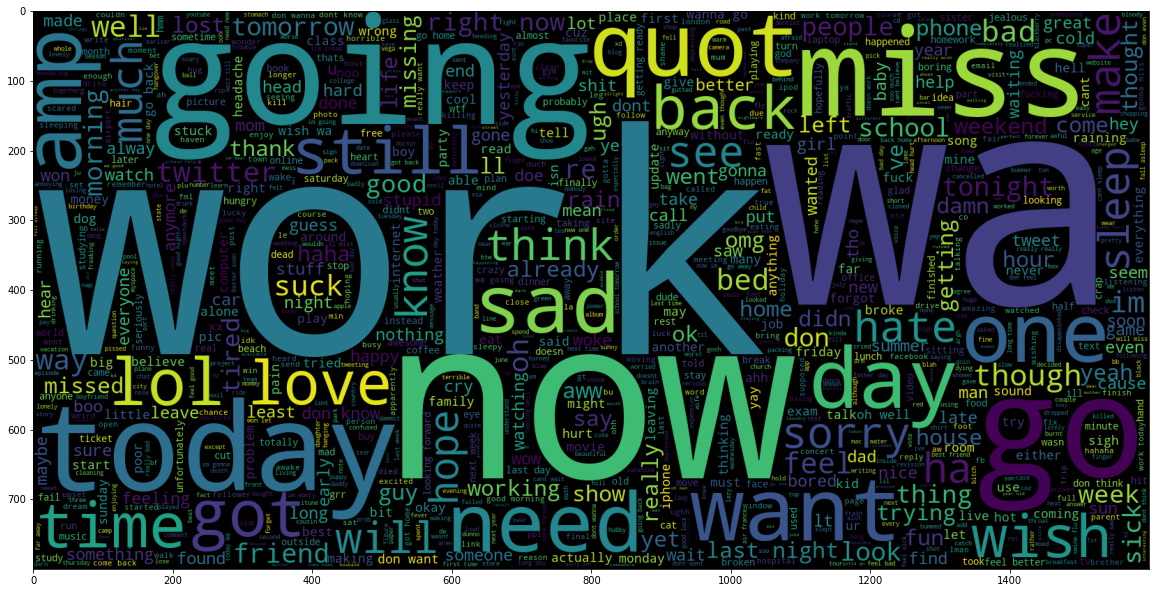

In [17]:
# Display words which belongs to label '0'

data_neg = processedtext[:800000]
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=True).generate(" ".join(data_neg))
plt.imshow(wc)

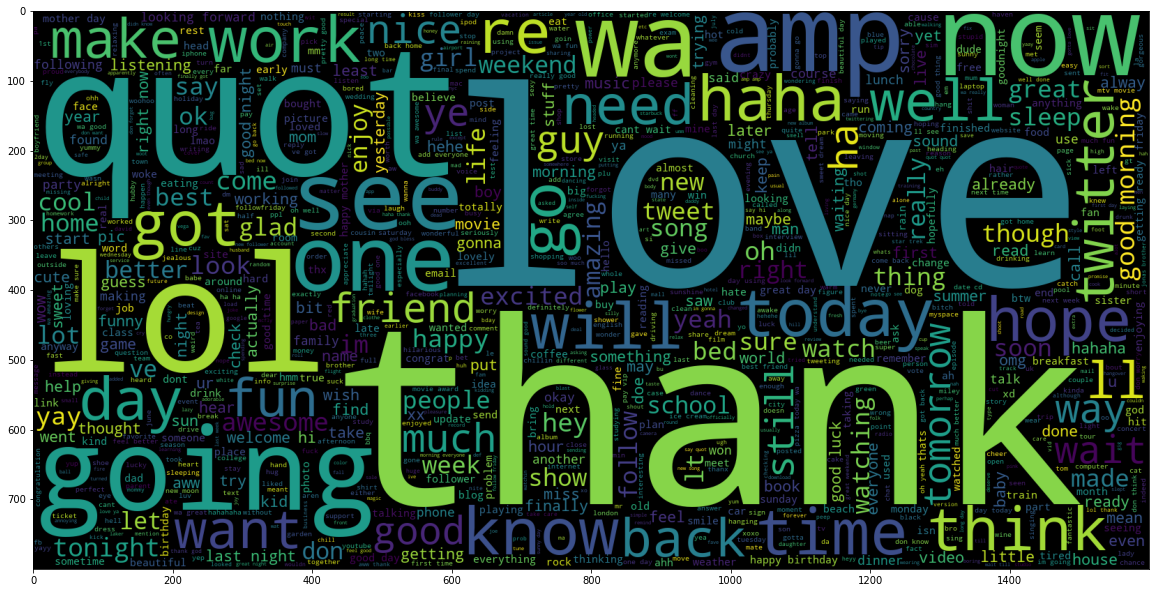

In [18]:
# Display words which belongs to label '4'

data_pos = processedtext[800000:]
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
              collocations=True).generate(" ".join(data_pos))
plt.figure(figsize = (20,20))
plt.imshow(wc)

## 6. Create Training and Test Data

In [19]:
# Define training inputs and targets

X_train = processedtext
y_train = sentiment

In [20]:
len(X_train), len(y_train)

(1600000, 1600000)

In [21]:
# Load test dataset to create test inputs and targets

df_test = pd.read_csv('./test/Twitter_Data.csv', encoding='ISO-8859-1')
df_test.head()

,clean_text,category
0,when modi promised âminimum government maxim...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [22]:
df_test.dropna(inplace=True)

In [23]:
df_test.rename(columns={"clean_text":"Tweet","category": "Sentiment_Score"}, inplace=True)

In [24]:
df_test.replace([-1,0,1],[0,2,4],inplace=True)

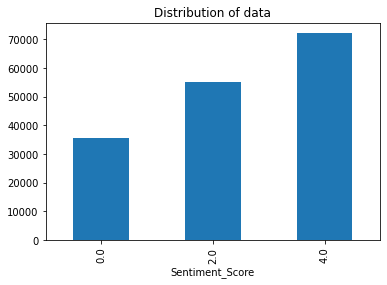

In [25]:
# Distribusion of test data

ax = df_test.groupby('Sentiment_Score').count().plot(kind='bar', title='Distribution of data',
                                               legend=False)

In [26]:
df_test

,Tweet,Sentiment_Score
0,when modi promised âminimum government maxim...,0.0
1,talk all the nonsense and continue all the dra...,2.0
2,what did just say vote for modi welcome bjp t...,4.0
3,asking his supporters prefix chowkidar their n...,4.0
4,answer who among these the most powerful world...,4.0
...,...,...
162975,why these 456 crores paid neerav modi not reco...,0.0
162976,dear rss terrorist payal gawar what about modi...,0.0
162977,did you cover her interaction forum where she ...,2.0
162978,there big project came into india modi dream p...,2.0


In [27]:
df_test.dtypes

Tweet               object
Sentiment_Score    float64
dtype: object

In [28]:
df_test['Sentiment_Score'].nunique()

3

In [29]:
df_test["Tweet"].dtype

dtype('O')

In [30]:
# 3 labels in test dataset but in train dataset there is only 2 labels so remove all records which contains label '2'
df_test.drop(df_test.index[df_test['Sentiment_Score'] == 2], inplace=True)
print(df_test['Sentiment_Score'].unique())

# Prepare test inputs and test targets
text_test, sentiment_test = list(df_test['Tweet']), list(df_test['Sentiment_Score'])
text_test

[0. 4.]


['when modi promised â\x80\x9cminimum government maximum governanceâ\x80\x9d expected him begin the difficult job reforming the state why does take years get justice state should and not business and should exit psus and temples',
 'what did just say vote for modi  welcome bjp told you rahul the main campaigner for modi think modi should just relax',
 'asking his supporters prefix chowkidar their names modi did great service now there confusion what read what not now crustal clear what will crass filthy nonsensical see how most abuses are coming from chowkidars',
 'answer who among these the most powerful world leader today trump putin modi may ',
 'with upcoming election india saga going important pair look current modi leads govt elected with deal brexit combination this weekly looks juicy bears imho ',
 'gandhi was gay does modi  ',
 'things like demonetisation gst goods and services taxâ\x80¦the upper castes would sort either view favourably say that need give this more time other 

In [31]:
len(text_test)

107758

In [32]:
len(sentiment_test)

107758

In [33]:
df_test["Sentiment_Score"].nunique()

2

In [34]:
df_test.Tweet = df_test.Tweet.astype(str)
df_test.Sentiment_Score = df_test.Sentiment_Score.astype(int)

In [35]:
df_test.dtypes

Tweet              object
Sentiment_Score     int32
dtype: object

In [36]:
len(df_test)

107758

In [37]:
len(text_test)

107758

In [38]:
processed_emoji_text_test = emoji(text_test)

In [39]:
processed_emoji_text_test

['when modi promised â\x80\x9cminimum government maximum governanceâ\x80\x9d expected him begin the difficult job reforming the state why does take years get justice state should and not business and should exit psus and temples',
 'what did just say vote for modi  welcome bjp told you rahul the main campaigner for modi think modi should just relax',
 'asking his supporters prefix chowkidar their names modi did great service now there confusion what read what not now crustal clear what will crass filthy nonsensical see how most abuses are coming from chowkidars',
 'answer who among these the most powerful world leader today trump putin modi may ',
 'with upcoming election india saga going important pair look current modi leads govt elected with deal brexit combination this weekly looks juicy bears imho ',
 'gandhi was gay does modi  ',
 'things like demonetisation gst goods and services taxâ\x80¦the upper castes would sort either view favourably say that need give this more time other 

In [40]:
len(processed_emoji_text_test)

107758

In [41]:
# Apply same pre-processing steps on test data

processedtext_test = preprocess(processed_emoji_text_test)

In [42]:
len(processedtext_test)

107758

In [43]:
processedtext_test

['when modi promised minimum government maximum governance expected him begin the difficult job reforming the state why doe take year get justice state should and not business and should exit psus and temple ',
 'what did just say vote for modi welcome bjp told you rahul the main campaigner for modi think modi should just relax ',
 'asking his supporter prefix chowkidar their name modi did great service now there confusion what read what not now crustal clear what will crass filthy nonsensical see how most abuse are coming from chowkidars ',
 'answer who among these the most powerful world leader today trump putin modi may ',
 'with upcoming election india saga going important pair look current modi lead govt elected with deal brexit combination this weekly look juicy bear imho ',
 'gandhi wa gay doe modi ',
 'thing like demonetisation gst good and service tax the upper caste would sort either view favourably say that need give this more time other caste like dalits the muslim were mor

In [44]:
# Final test inputs and test targets

X_test = processedtext_test
y_test = sentiment_test

In [45]:
len(df_test)

107758

In [46]:
len(X_test)

107758

In [47]:
len(y_test)

107758

## 7. Train and Test data vectorization

In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Train the vectoriser on train dataset
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit(X_train)

TfidfVectorizer(max_features=500000, ngram_range=(1, 2))

In [49]:
# Apply vectorization on training and test dataset

X_train = vectoriser.transform(X_train)
X_test = vectoriser.transform(X_test)

## 8. Create and train ML models

In [50]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression

# Bernoulli Naive Bayes (BernoulliNB)
BNBmodel = BernoulliNB(alpha = 2)
BNBmodel.fit(X_train, y_train)

BernoulliNB(alpha=2)

In [51]:
# Logistic Regression

LRmodel = LogisticRegression()
LRmodel.fit(X_train, y_train)

LogisticRegression()

In [52]:
from sklearn.metrics import confusion_matrix

y_pred=BNBmodel.predict(X_test)

In [53]:
X_test.shape

(107758, 500000)

In [54]:
len(y_test), len(y_pred)

(107758, 107758)

## 9. Evaluation Function

In [55]:
from sklearn.metrics import confusion_matrix, classification_report

def model_Evaluate(model):
    
    # Predict values for Test dataset
    y_pred = model.predict(X_test)

    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))
    
    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)

    categories  = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
                xticklabels = categories, yticklabels = categories)

    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

              precision    recall  f1-score   support

         0.0       0.52      0.45      0.48     35509
         4.0       0.75      0.79      0.77     72249

    accuracy                           0.68    107758
   macro avg       0.63      0.62      0.63    107758
weighted avg       0.67      0.68      0.67    107758



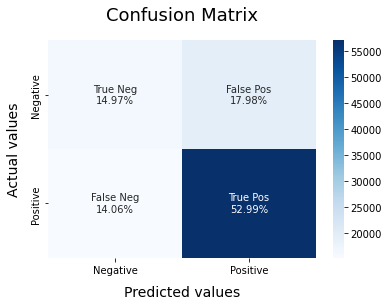

In [56]:
model_Evaluate(BNBmodel)

              precision    recall  f1-score   support

         0.0       0.51      0.58      0.55     35509
         4.0       0.78      0.73      0.75     72249

    accuracy                           0.68    107758
   macro avg       0.65      0.66      0.65    107758
weighted avg       0.69      0.68      0.69    107758



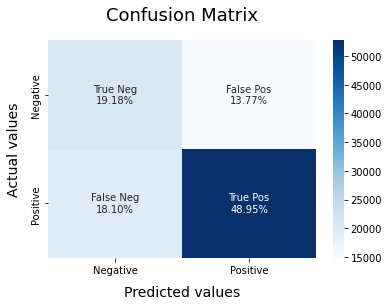

In [57]:
model_Evaluate(LRmodel)

Let's try our models on single input.

In [58]:
inp = []
inp.append("I am not good 😢😢")
processed_emoji_text_inp = emoji(inp)
processedinp = preprocess(processed_emoji_text_inp)
inp = vectoriser.transform(processedinp)
print(processedinp)

LRmodel.predict(inp)
LRmodel.predict_proba(inp)

['am not good cry facecrying facecrying facecrying facecrying facecrying face ']


array([[0.99762693, 0.00237307]])